In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Handling class imbalance

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("final_data.csv")
df = data.copy()
print(df.shape)
df.head()

(529, 66)


,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,0,28,19.3,78,5,7.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,36,24.9,74,5,11.0,1,0,60.80,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,33,25.3,72,5,10.0,1,0,494.08,494.08,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,37,29.7,72,5,4.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,25,20.1,72,5,1.0,1,0,801.45,801.45,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [3]:
df.describe()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
count,529.000000,529.000000,529.00000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.323251,31.425331,24.32344,73.474480,4.937618,7.651607,0.387524,0.283554,677.077289,242.586936,...,0.001890,0.981096,0.003781,0.996219,0.001890,0.998110,0.236295,0.763705,0.158790,0.841210
std,0.468161,5.430222,4.08396,2.709378,1.498068,4.801196,0.487646,0.684607,3385.601032,1621.544221,...,0.043478,0.136314,0.061429,0.061429,0.043478,0.043478,0.425207,0.425207,0.365826,0.365826
min,0.000000,20.000000,12.40000,70.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,21.60000,72.000000,5.000000,4.000000,0.000000,0.000000,1.990000,1.990000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,31.000000,24.20000,72.000000,5.000000,7.000000,0.000000,0.000000,20.000000,1.990000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,26.70000,74.000000,5.000000,10.000000,1.000000,0.000000,300.530000,100.090000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,48.000000,38.90000,82.000000,12.000000,30.000000,1.000000,5.000000,32460.970000,25000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.keys()

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+',
       'Blood Group_AB-', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+',
       'Blood Group_O-', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular', 'Symptoms score',
       'Unhealthy living score', 'RR (breaths/min)_high',
       'RR (breaths/min)_normal', 'Hb(g/dl)_low', 'Hb(g/dl)_normal',
       'TSH (mIU/L)_high', 'TSH (mIU/L)_low', 'TSH (mIU/L)_normal',
       'AMH(ng/mL)_

## Data Preparation
- Split dataset (80-20)
- Standardise features
- Handle class imbalance with SMOTE

In [5]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variables
X= df.drop(['PCOS (Y/N)'], axis=1) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# standardise featres
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# handle class imbalance with SMOTE (for oversampling)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

  File "c:\Users\XuanHuan.DESKTOP-SFCP3LA\Desktop\DSA4264\dsa4262_pcos\dsa4262_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Logistic Regression

In [9]:
# define model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_auc_roc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovr_weighted')

In [11]:
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy: {cv_accuracy_scores.mean():.4f}")

print(f"Cross-Validation AUC-ROC Scores: {cv_auc_roc_scores}")
print(f"Mean AUC-ROC: {cv_auc_roc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.89565217 0.91304348 0.81578947 0.95614035 0.90350877]
Mean Accuracy: 0.8968
Cross-Validation AUC-ROC Scores: [0.92953846 0.97261108 0.9058642  0.99197531 0.96265432]
Mean AUC-ROC: 0.9525


In [12]:
model.fit(X_train,y_train)

print("The intercept b0= ", model.intercept_)
print("The coefficient b1= ", model.coef_)

# predict test set
y_pred= model.predict(X_test)

The intercept b0=  [-1.32812984]
The coefficient b1=  [[-0.3519783   0.36719915  0.48918055 -0.34128403 -0.51725164 -0.2213823
  -0.25998604 -0.54822106  0.47119863 -0.05271624 -0.22899643  0.36373303
   0.61464497  0.43877067 -0.02622079  0.38222425  0.4472055   0.4454155
   0.35959549  1.90167471  0.30912132  0.21311126  0.18987463  0.25610814
  -0.21456214 -0.13875887 -0.17022512  0.13941554  0.18470264 -0.20271874
  -0.10669141  0.25935254 -0.25935254  0.54630187  0.05035024 -0.14733848
   0.14733848  0.07754481 -0.07754481  0.21786529 -0.17100493 -0.17186167
  -0.01683904  0.30003063 -0.15729788  0.08356126  0.07933543 -0.15116423
   0.01844262  0.12248067 -0.12125483 -0.23630412  0.22832849 -0.11202126
   0.26985177 -0.04226549 -0.22927708 -0.0425797   0.0425797  -0.04537099
   0.04537099  0.07437901 -0.07437901 -0.0101743   0.0101743 ]]


[[62 10]
 [ 3 31]]


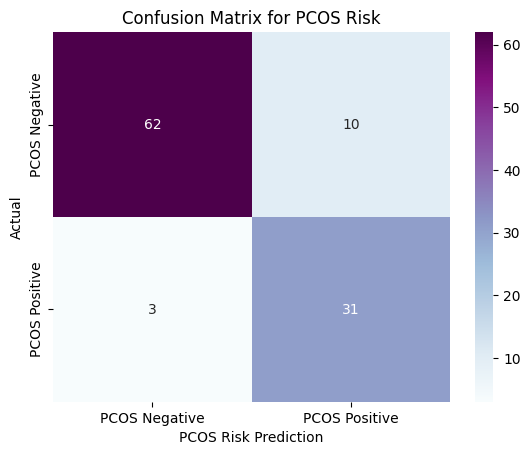

In [13]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
plt.show()

## Hyperparameter Tuning with GridSearchCV
- finding best parameters for best auc-roc score

In [14]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Grid-Search AUC-ROC score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Grid-Search AUC-ROC score: 0.9652


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

In [17]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC-ROC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8774
Test AUC-ROC Score: 0.9534

Confusion Matrix:
 [[62 10]
 [ 3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.91        72
           1       0.76      0.91      0.83        34

    accuracy                           0.88       106
   macro avg       0.85      0.89      0.87       106
weighted avg       0.89      0.88      0.88       106



## Logistic Regression with RFE
- See if it improves model performance

- Steps:
    - Standardisation
    - SMOTE
    - RFE
    - K-fold cross validation
    - GridSearchCV

In [18]:
from sklearn.feature_selection import RFE

In [19]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standardise features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [20]:
base_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# use RFE to select top 10 features
rfe = RFE(base_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)  # apply same transformation to test set

# get selected feature indices
selected_features = np.where(rfe.support_)[0]
print(f"Selected Feature Indices: {selected_features}")


Selected Feature Indices: [ 4  7 12 16 17 18 19 32 33 52]


In [21]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)

cv_accuracy_scores = cross_val_score(model, X_train_rfe, y_train, cv=kf, scoring='accuracy')
cv_auc_roc_scores = cross_val_score(model, X_train_rfe, y_train, cv=kf, scoring='roc_auc_ovr_weighted')

print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy After Feature Selection: {cv_accuracy_scores.mean():.4f}")
print(f"Cross-Validation ROC-AUC Scores: {cv_auc_roc_scores}")
print(f"Mean ROC-AUC After Feature Selection: {cv_auc_roc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.91304348 0.93913043 0.86842105 0.98245614 0.87719298]
Mean Accuracy After Feature Selection: 0.9160
Cross-Validation ROC-AUC Scores: [0.97046154 0.98174072 0.91111111 0.98703704 0.9537037 ]
Mean ROC-AUC After Feature Selection: 0.9608


## Hyperparameter Tuning with GridSearchCV (with RFE)

In [22]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1)
grid_search.fit(X_train_rfe, y_train)

print(f"Best Parameters After Feature Selection: {grid_search.best_params_}")
print(f"Best Cross-Validation ROC-AUC score: {grid_search.best_score_:.4f}")


Best Parameters After Feature Selection: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation ROC-AUC score: 0.9678


In [23]:
# evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_rfe)
y_prob = best_model.predict_proba(X_test_rfe)[:, 1]  # probability scores for AUC-ROC


In [24]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy After Feature Selection: {accuracy:.4f}")
print(f"Test AUC-ROC Score After Feature Selection: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy After Feature Selection: 0.9057
Test AUC-ROC Score After Feature Selection: 0.9706

Confusion Matrix:
 [[65  7]
 [ 3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        72
           1       0.82      0.91      0.86        34

    accuracy                           0.91       106
   macro avg       0.89      0.91      0.89       106
weighted avg       0.91      0.91      0.91       106

